In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import string
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
data=pd.read_csv("/content/sample_data/Elon_musk.csv", encoding='cp1252', index_col=0)
data.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [5]:
data=[x.strip() for x in data.Text]
data=[x for x in data if x]
data[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
# joining as a whole text
text=''.join(data)
text

'@kunalb11 I’m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It’s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [7]:
# remove the tweeter handle name
tknzr=TweetTokenizer(strip_handles=True)
tweet_tkn=tknzr.tokenize(text)
print(tweet_tkn)

['I', '’', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '’', 's', 'getting', 'realBought',

In [8]:
# join the tweet removed token
tweet_join=''.join(tweet_tkn)
print(tweet_join)

I’manalien@ID_AA_CarmackRaytracingonCyberpunkwithHDRisnext-level.Haveyoutriedit?Greatinterview!@gtera27Dogeisunderestimated@teslacnCongratulationsTeslaChinaforamazingexecutionlastyear.Nowontothenextforevenmore!!HappyNewYearoftheOx!https://t.co/9WFKMYu2ojFrodowastheunderdoge,Allthoughthewouldfail,Himselfmostofall.https://t.co/zGxJFDzzrM@OwenSparks_Hahathanks:)Indeed!Tweetsdefinitelydonotrepresentreal-worldtimeallocation.Themostentertainingoutcomeisthemostlikely@GiveDirectlyJustsentsomeJustagreetodoClubhousewith://t.co/3rWE9uHSTS@geoffkeighleyIt’sgettingrealBoughtsomeDogecoinforlilX,sohecanbeatoddlerhodler@JoshManModeHedefinitelyhasissues,butthesentencingseemsabithigh@freewalletorgThanksforfixing@freewalletorgPleaseunlockmyaccount@AstroJordy<U+0001F923><U+0001F923>Thisistruepowerhahahttps://t.co/Fc9uhQSd7O@freewalletorgAnycryptowalletthatwon’tgiveyouyourprivatekeysshouldbeavoidedatallcosts@freewalletorgYourappsucksRT:NASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewayt

In [9]:
# remove punctuation
no_punc_text=tweet_join.translate(tweet_join.maketrans('','', string.punctuation))
no_punc_text
#tokenization

# text_token=word_tokenize(n0_punc_text)
#print(text_token)

'I’manalienIDAACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutrieditGreatinterviewgtera27DogeisunderestimatedteslacnCongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmoreHappyNewYearoftheOxhttpstco9WFKMYu2ojFrodowastheunderdogeAllthoughthewouldfailHimselfmostofallhttpstcozGxJFDzzrMOwenSparksHahathanksIndeedTweetsdefinitelydonotrepresentrealworldtimeallocationThemostentertainingoutcomeisthemostlikelyGiveDirectlyJustsentsomeJustagreetodoClubhousewithtco3rWE9uHSTSgeoffkeighleyIt’sgettingrealBoughtsomeDogecoinforlilXsohecanbeatoddlerhodlerJoshManModeHedefinitelyhasissuesbutthesentencingseemsabithighfreewalletorgThanksforfixingfreewalletorgPleaseunlockmyaccountAstroJordyU0001F923U0001F923ThisistruepowerhahahttpstcoFc9uhQSd7OfreewalletorgAnycryptowalletthatwon’tgiveyouyourprivatekeysshouldbeavoidedatallcostsfreewalletorgYourappsucksRTNASAhasselectedFalconHeavytolaunchthefirsttwoelementsofthelunarGatewaytogetherononemissionhttpstco3pWt…YesBLKMDL3Oncewecanpredictc

In [10]:
# removal of url from the text
import re
no_url=re.sub(r'http\S+', '', no_punc_text)
no_url

'I’manalienIDAACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutrieditGreatinterviewgtera27DogeisunderestimatedteslacnCongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmoreHappyNewYearoftheOx'

In [11]:
# tokenization
text_token=word_tokenize(no_url)
print(text_token)

['I', '’', 'manalienIDAACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutrieditGreatinterviewgtera27DogeisunderestimatedteslacnCongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmoreHappyNewYearoftheOx']


In [12]:
# stopwords
nltk.download('stopwords')
stop_txt=pd.read_fwf("/content/sample_data/stop.txt")
stop_txt.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,a
0,a's
1,able
2,about
3,above
4,according


In [13]:
sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I',',']
my_stop_word=stopwords.words('english')
my_stop_word.extend(sw_list)
my_stop_word.extend(stop_txt.a)
len(my_stop_word)
print(my_stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# remove stop words: word for word in text_tokens if not word in my_stop_word
no_stop_words=[words for words in text_token if not words in my_stop_word]
no_stop_words[0:20]

['’',
 'manalienIDAACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutrieditGreatinterviewgtera27DogeisunderestimatedteslacnCongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmoreHappyNewYearoftheOx']

In [15]:
# Normalise the data : making all data into lowercase
lower_words=[x.lower() for x in no_stop_words]
lower_words[0:20]

['’',
 'manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox']

In [16]:
# stemming
# in stemming so many words will not come to actual root version
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_token=[ps.stem(words) for words in lower_words]
stemmed_token[0:20]

['’',
 'manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox']

In [17]:
# lematization
!python -m spacy download en_core_web_sm

2023-08-29 14:53:24.008434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(''.join(no_stop_words))
doc[0:10]

’manalienIDAACarmackRaytracingonCyberpunkwithHDRisnextlevelHaveyoutrieditGreatinterviewgtera27DogeisunderestimatedteslacnCongratulationsTeslaChinaforamazingexecutionlastyearNowontothenextforevenmoreHappyNewYearoftheOx

In [19]:
lemma=[token.lemma_ for token in doc]
lemma[0:10]

["'",
 'manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox']

In [20]:
# join the lemmas
extract_tweet=''.join(lemma)
extract_tweet

"'manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox"

Feature extraction

In [21]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemma)

In [22]:
print(vectorizer.vocabulary_)

{'manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox': 0}


In [23]:
vect_DF=pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=['frequency']).T
vect_DF

,frequency
manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox,0


In [24]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(10)

,0
manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox,0


In [25]:
print(vectorizer.get_feature_names_out()[100:200])

[]


Bigram and Trigram analysis

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=200)
matrix_ngram=cv_ngram_range.fit_transform(lemma)

In [27]:
cv_ngram_range.get_feature_names_out()

array(['manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox'],
      dtype=object)

TF -IDF vectorizer

In [28]:
tfidf_ngram_max_feature=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidf_ngram_max_feature.fit_transform(lemma)

In [29]:
print(tfidf_ngram_max_feature.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['manalienidaacarmackraytracingoncyberpunkwithhdrisnextlevelhaveyoutrieditgreatinterviewgtera27dogeisunderestimatedteslacncongratulationsteslachinaforamazingexecutionlastyearnowontothenextforevenmorehappynewyearoftheox']
[[0.]
 [1.]]


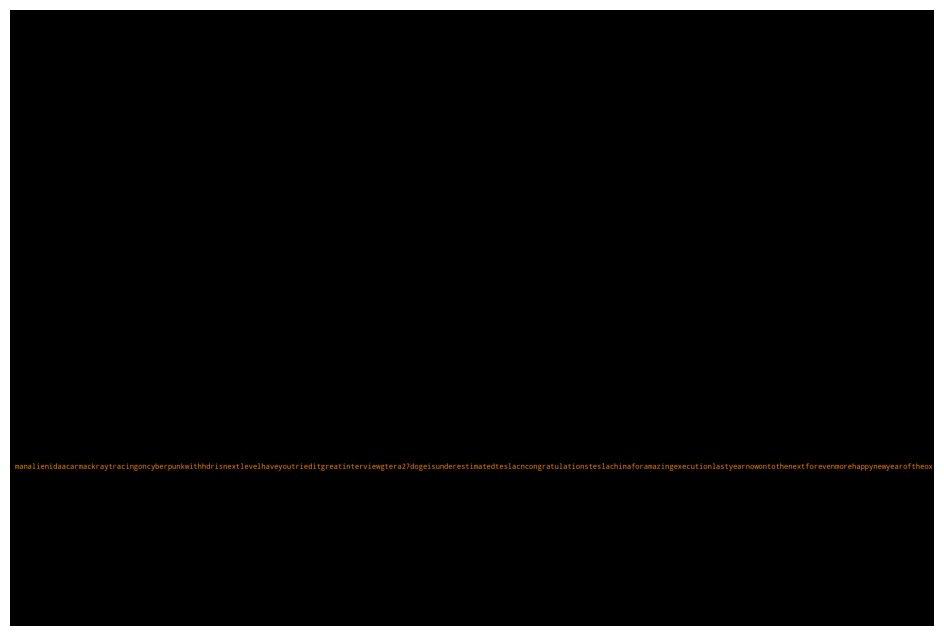

In [31]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(20,8))
  plt.imshow(wordcloud)
  plt.axis('off')

my_stop_word.extend('pron')
my_stop_word.extend('rt')
my_stop_word.extend('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,colormap='autumn',stopwords=my_stop_word).generate(extract_tweet)
plot_cloud(wordcloud)


Name Entity Recognition

In [35]:
nlp=spacy.load('en_core_web_sm')

one_block=extract_tweet
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [38]:
for token in doc_block[100:200]:
  print(token,token.pos_)

In [39]:
# filtering the noun and verb token
noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[100:200])

[]


In [40]:
#counting the noun_verb token
cv=CountVectorizer()
X=cv.fit_transform(noun_verb)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
#cv.vocabulary_.items()
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]


,word,count
0,manalienidaacarmackraytracingoncyberpunkwithhd...,1


<Axes: title={'center': 'Top 30 noun and verb'}, xlabel='word'>

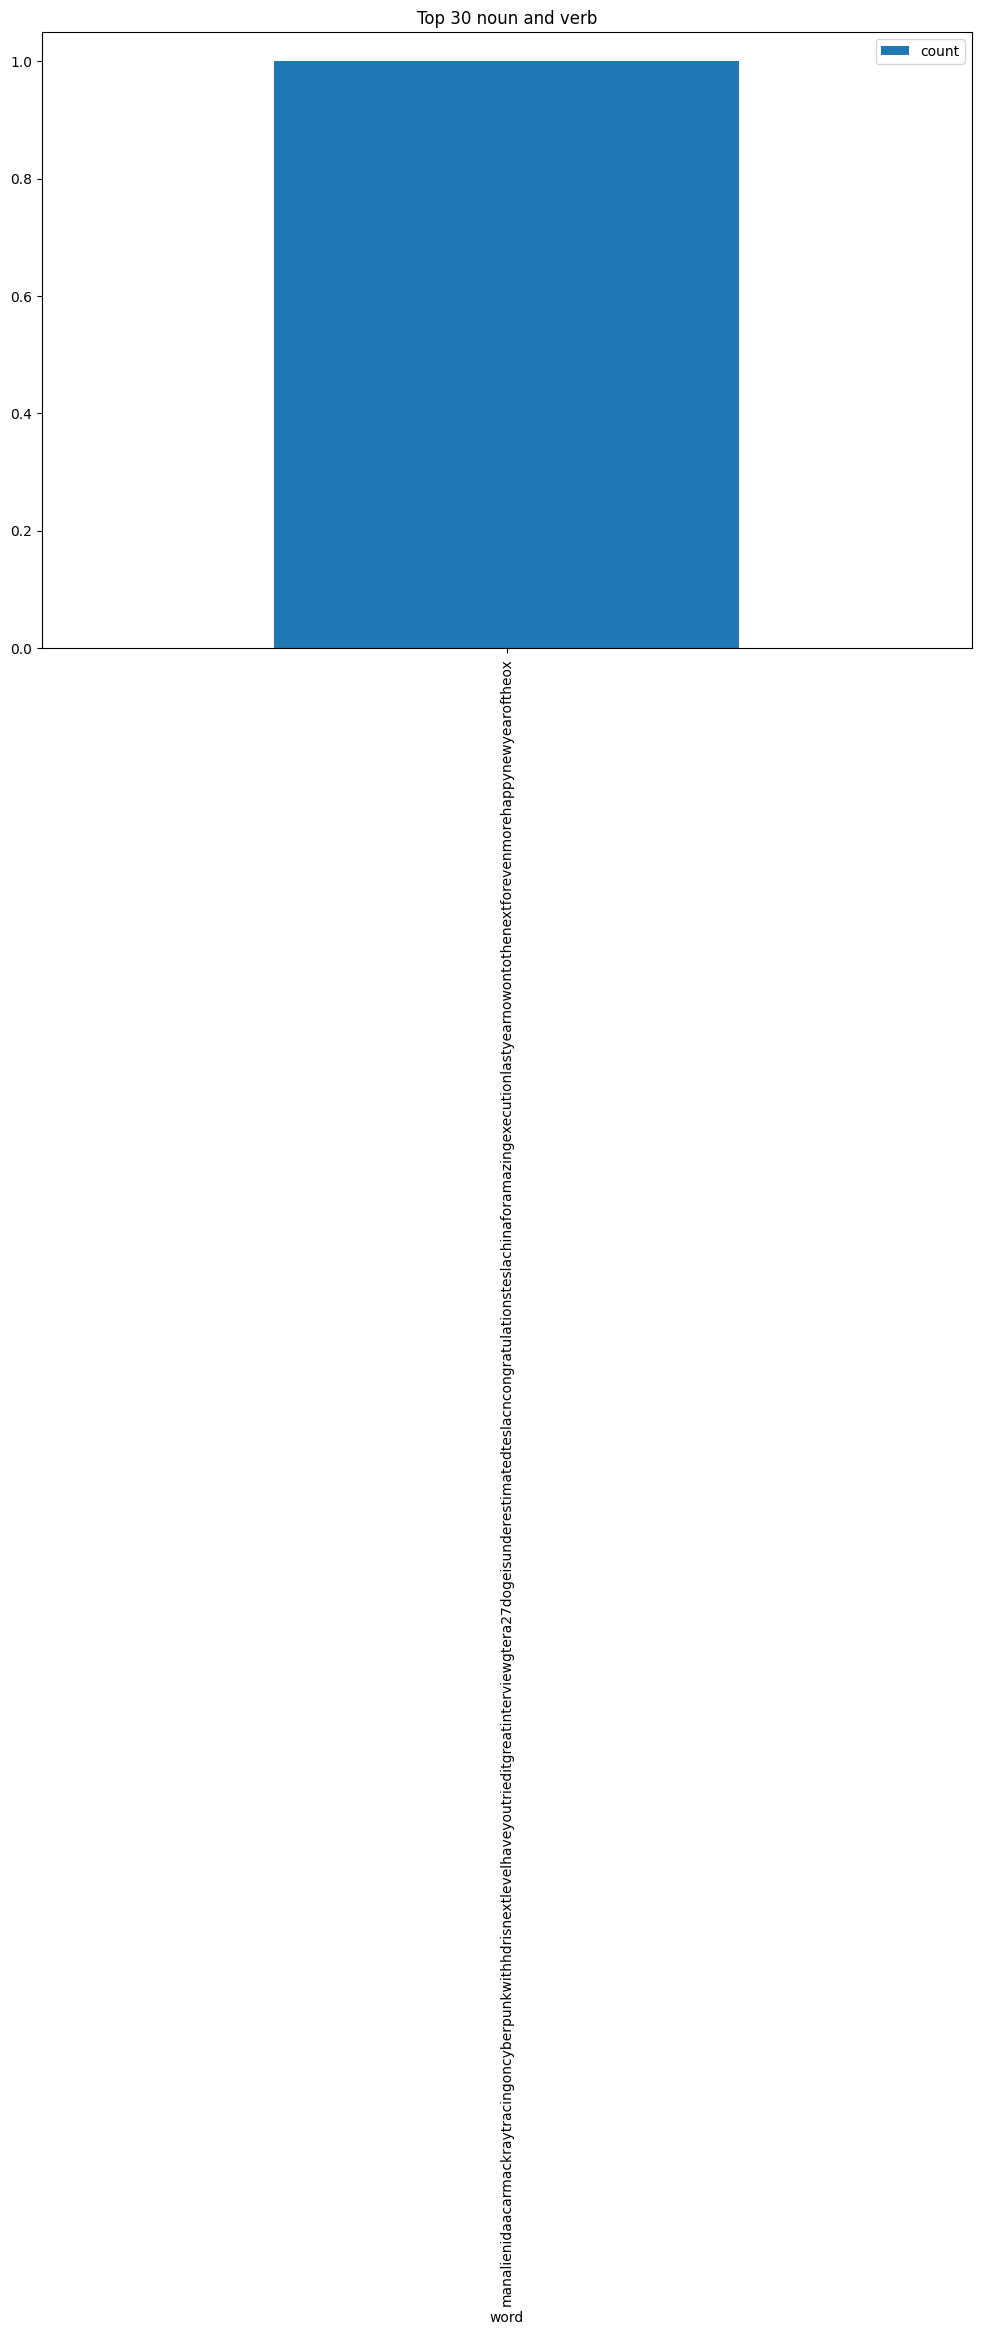

In [41]:
wd_df[0:30].plot.bar(x='word',figsize=(12,8),title='Top 30 noun and verb')

lets go for sentiment analysis

In [42]:
affin =pd.read_csv("/content/sample_data/Afinn.csv",sep=',',encoding='latin-1')
affin.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [43]:
affinity_score=affin.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
data_sentiment=pd.read_csv("/content/sample_data/Elon_musk.csv",encoding='cp1252',index_col=0)
data_sentiment.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [45]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [46]:
calculate_sentiment('excellent')

3

In [47]:
data_sentiment['sentiment_value']=data_sentiment['Text'].apply(calculate_sentiment)
data_sentiment

,Text,sentiment_value
1,@kunalb11 I’m an alien,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
3,@joerogan @Spotify Great interview!,3
4,@gtera27 Doge is underestimated,-1
5,@teslacn Congratulations Tesla China for amazi...,4
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",-3
1996,@PPathole Make sure to read ur terms &amp; con...,1
1997,@TeslaGong @PPathole Samwise Gamgee,0
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


In [48]:
data_sentiment['word_count']=data_sentiment['Text'].str.split().apply(len)
data_sentiment.head()

,Text,sentiment_value,word_count
1,@kunalb11 I’m an alien,0,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
3,@joerogan @Spotify Great interview!,3,4
4,@gtera27 Doge is underestimated,-1,4
5,@teslacn Congratulations Tesla China for amazi...,4,17


In [49]:
data_sentiment.sort_values(by='sentiment_value')

,Text,sentiment_value,word_count
187,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1016,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1638,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1718,@Neuro_Skeptic They don’t fire all at once. So...,-6,20
1064,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5,21
...,...,...,...
1358,Great trip to Germany. Support from government...,10,12
469,@picot_john @CyberpunkGame It’s a good to grea...,10,20
459,@teslaownerssv It will get absurdly good. Tesl...,10,18
1305,"One way or another, excitement guaranteed! Sup...",11,17


In [50]:
data_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_value,1999.0,0.635318,1.725848,-7.0,0.0,0.0,1.0,12.0
word_count,1999.0,10.578789,6.706165,1.0,4.0,9.0,17.0,30.0


In [51]:
data_sentiment[data_sentiment['sentiment_value']<0]

,Text,sentiment_value,word_count
4,@gtera27 Doge is underestimated,-1,4
7,"Frodo was the underdoge,\nAll thought he would...",-2,14
16,"@JoshManMode He definitely has issues, but the...",-2,12
21,@freewalletorg Any crypto wallet that won’t gi...,-1,17
22,@freewalletorg Your app sucks,-3,4
...,...,...,...
1976,@RationalEtienne @flcnhvy @PPathole @IheartTes...,-3,10
1977,@thatt3slaguy @flcnhvy @PPathole @IheartTesla ...,-1,16
1991,"@kenyanwalstreet Not actually a payout, just a...",-1,22
1992,@IheartTesla No easy way to answer this in a t...,-3,23


In [52]:
data_sentiment[data_sentiment['sentiment_value']<0]

,Text,sentiment_value,word_count
4,@gtera27 Doge is underestimated,-1,4
7,"Frodo was the underdoge,\nAll thought he would...",-2,14
16,"@JoshManMode He definitely has issues, but the...",-2,12
21,@freewalletorg Any crypto wallet that won’t gi...,-1,17
22,@freewalletorg Your app sucks,-3,4
...,...,...,...
1976,@RationalEtienne @flcnhvy @PPathole @IheartTes...,-3,10
1977,@thatt3slaguy @flcnhvy @PPathole @IheartTesla ...,-1,16
1991,"@kenyanwalstreet Not actually a payout, just a...",-1,22
1992,@IheartTesla No easy way to answer this in a t...,-3,23


In [53]:
data_sentiment[data_sentiment['sentiment_value']==0]

,Text,sentiment_value,word_count
1,@kunalb11 I’m an alien,0,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,7
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,11
11,@GiveDirectly Just sent some,0,4
...,...,...,...
1985,@burakaydik True,0,2
1993,AI symbiosis while u wait,0,5
1994,@vistacruiser7 @flcnhvy There’s some of that too,0,7
1997,@TeslaGong @PPathole Samwise Gamgee,0,4


In [54]:
data_sentiment['index']=range(0,len(data_sentiment))
data_sentiment.head()

,Text,sentiment_value,word_count,index
1,@kunalb11 I’m an alien,0,4,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13,1
3,@joerogan @Spotify Great interview!,3,4,2
4,@gtera27 Doge is underestimated,-1,4,3
5,@teslacn Congratulations Tesla China for amazi...,4,17,4


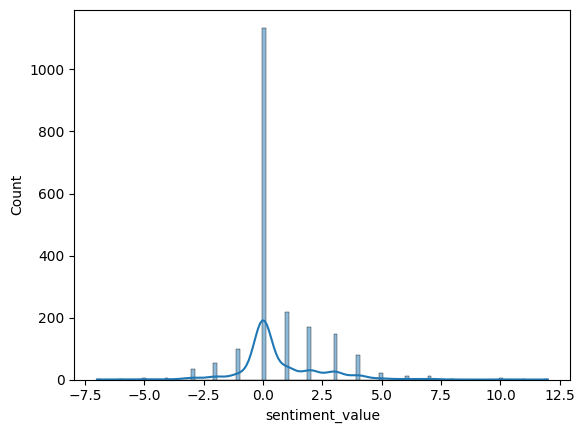

In [55]:
sns.histplot(data_sentiment['sentiment_value'],kde=True)
plt.show()

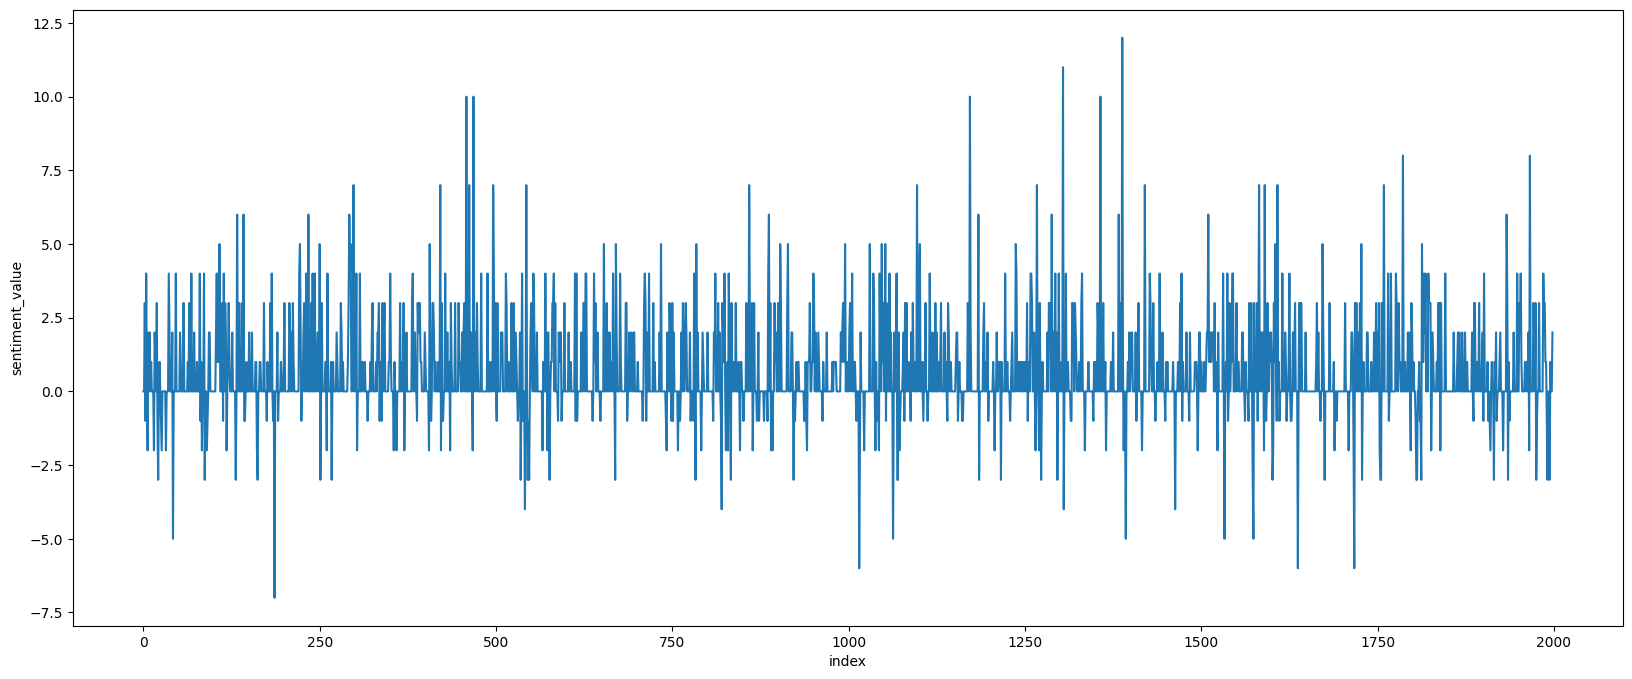

In [56]:
plt.figure(figsize=(20,8))
sns.lineplot(y='sentiment_value',x='index',data=data_sentiment)
plt.show()